# Time Series clustering notebook

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [2]:
from data.param_data_loader2 import ParamDL2
from data.param_data_loader2 import ParamDL2Chunks, cf_failure_dict

dataset = ParamDL2()
# dataset.summarize()
clusterer = ParamDL2Chunks(dataset, cf_failure_dict, 30, 20, data_fields=["calibratedAx", "accelpedal", "brakepedal"])

/opt/homebrew/Caskroom/miniconda/base/envs/SURE/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Processing Congestion
Processed 24 Congestions
Saved Congestion File
Processing Car Following
Processed 60 cf_events
Saved Car Following File
Datast Loaded. Preview of dataset: 
   driver  trip  congestion  cf_idx  type    time  gmm_n_cluster  \
0       1    53           0       0     0  1698.8              4   
1       1    53           0       0     0  1698.9              4   
2       1    53           0       0     0  1699.0              4   
3       1    53           0       0     0  1699.1              4   
4       1    53           0       0     0  1699.2              4   

   rank_0_cluster  rank_1_cluster  rank_2_cluster  ...  timeHeadway  VL_theta  \
0               3               2               1  ...     2.294240  0.137128   
1               3               2               1  ...     2.304333  0.137128   
2               3               2               1  ...     2.278744  0.138907   
3               3               2               1  ...     2.277959  0.140121   
4       

In [3]:
# clusterer.plot_elbow_method(clusterer.calculate_wcss(8))

# 4 clusters it is

In [4]:
model, labels, clustered_series = clusterer.fit(5)

There are [403, 206, 176, 33, 459]


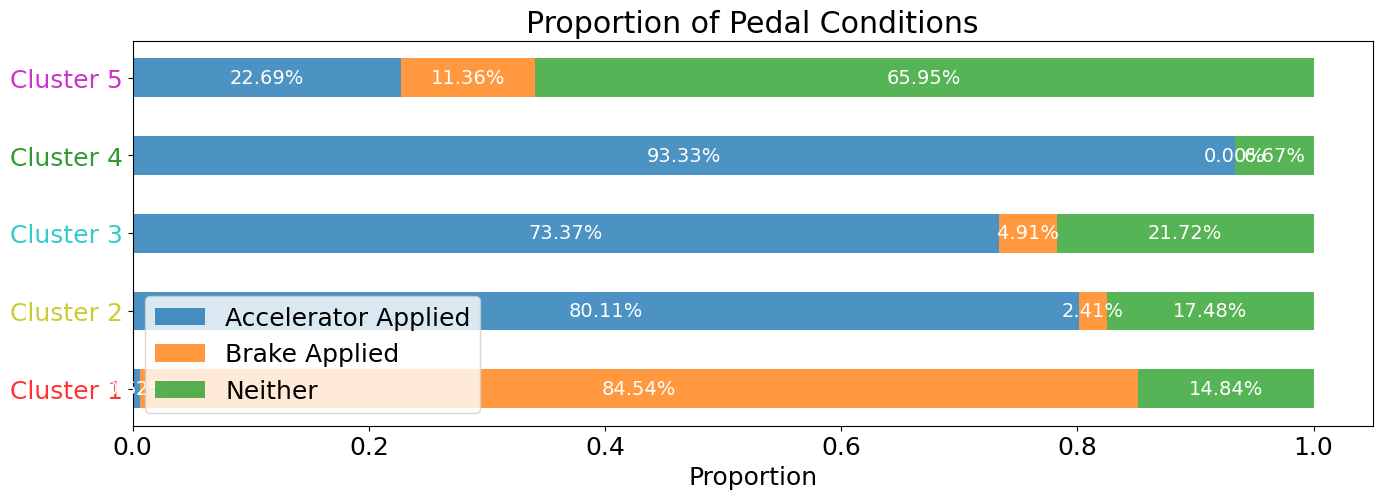

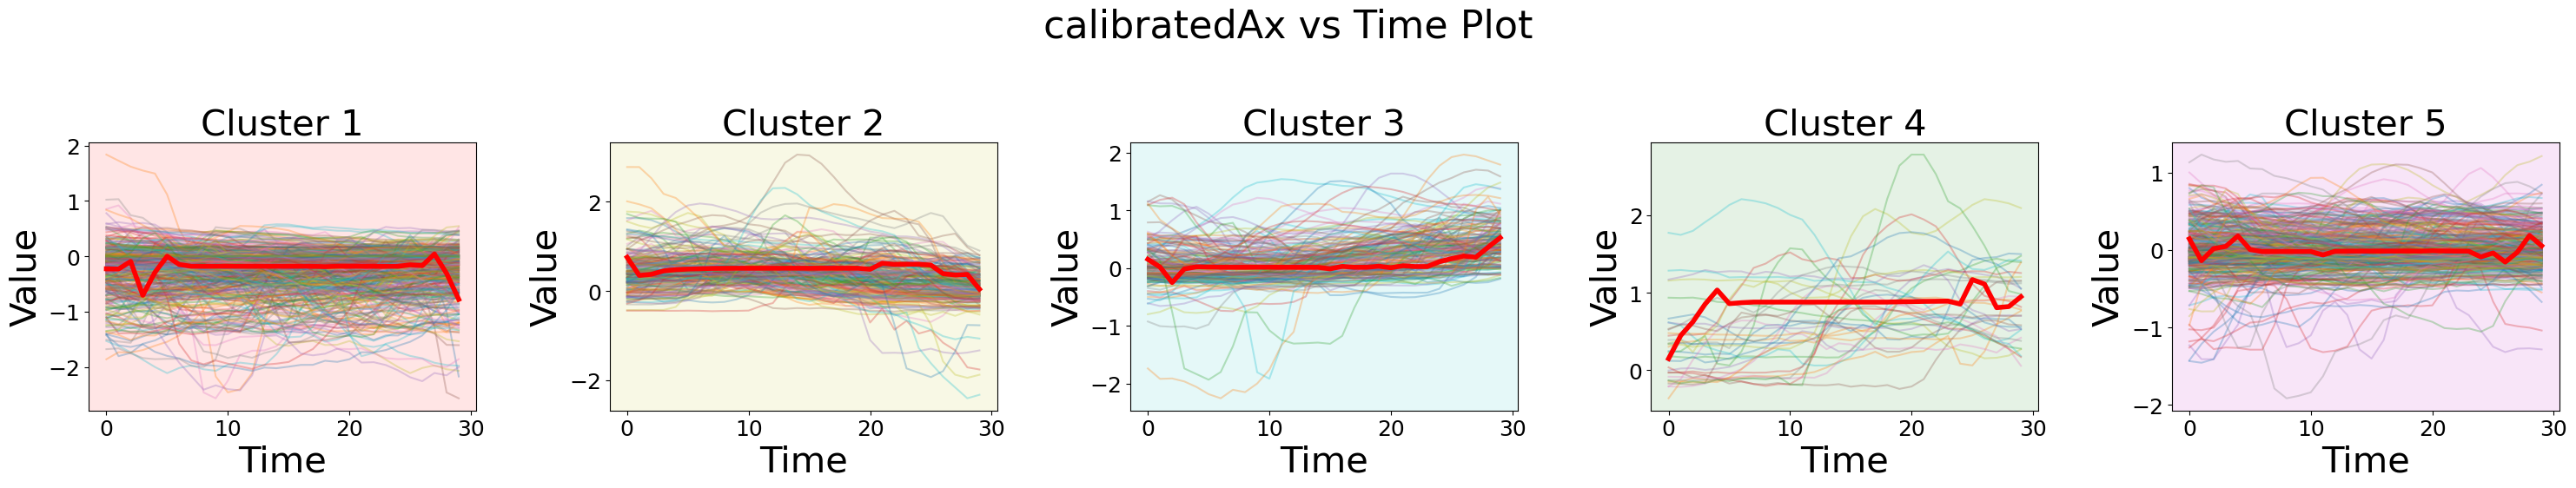

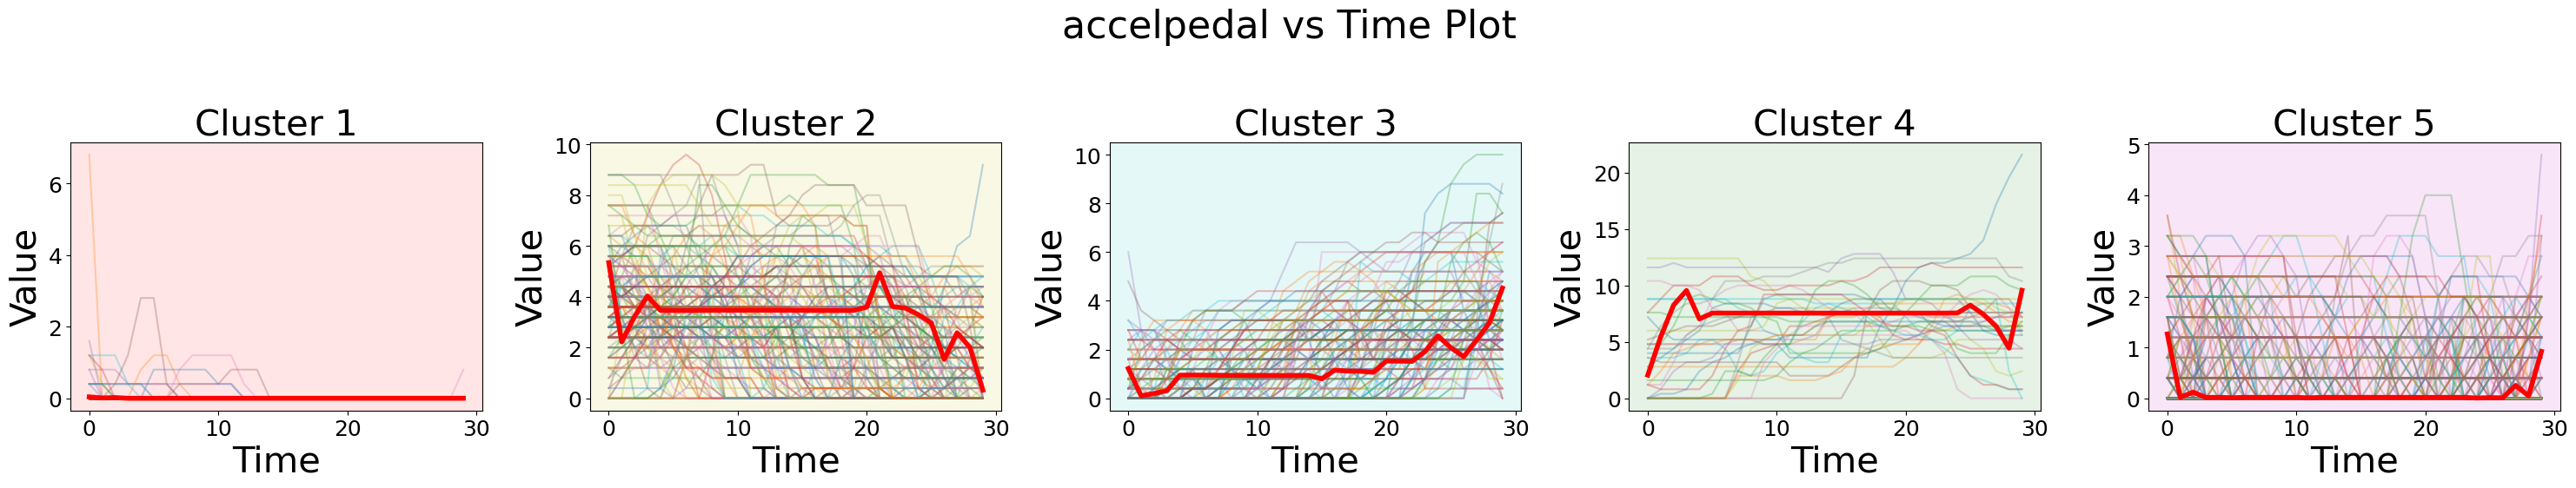

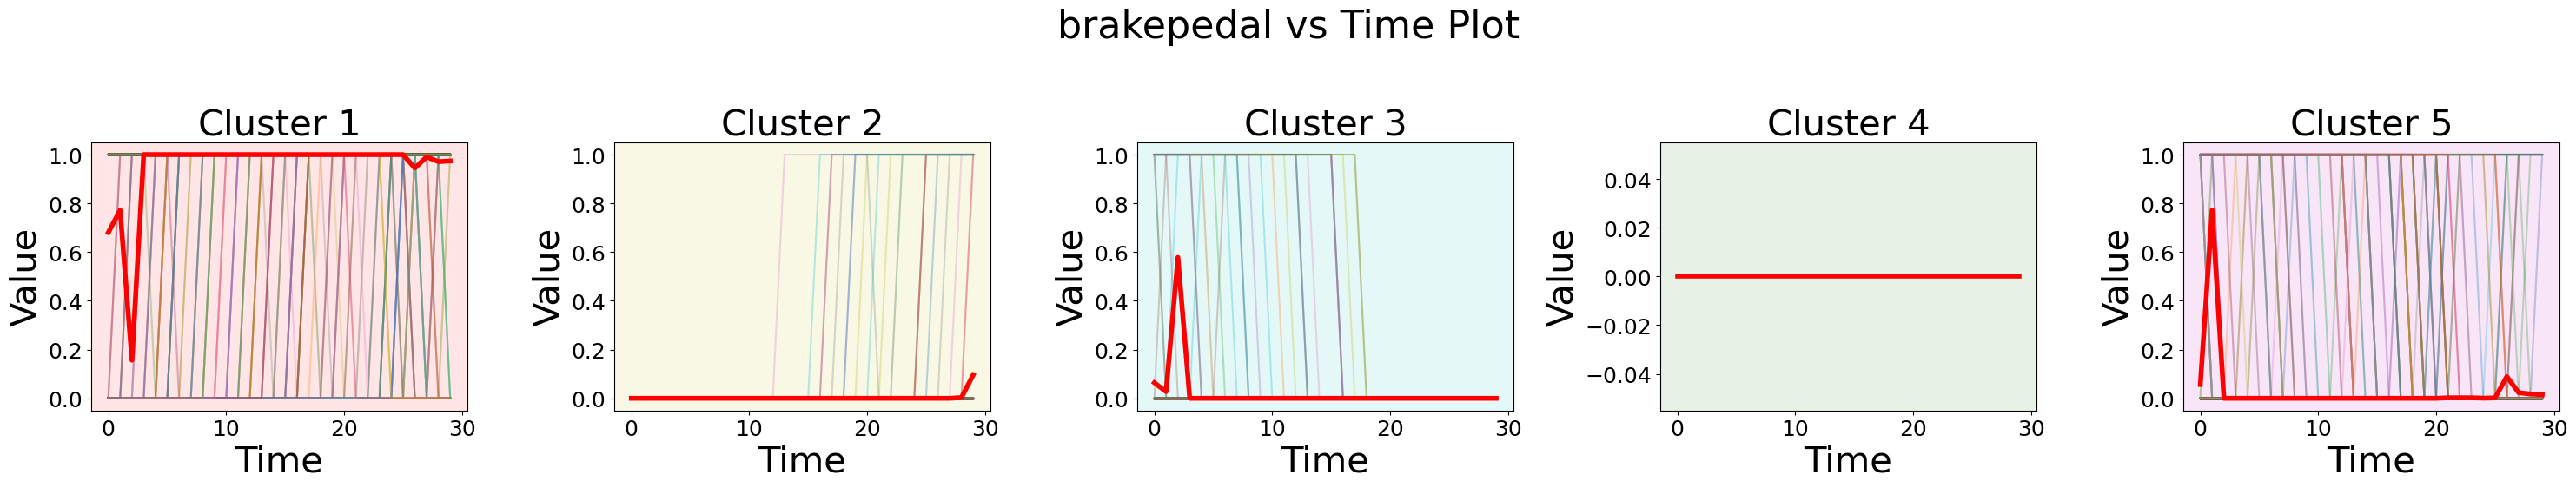

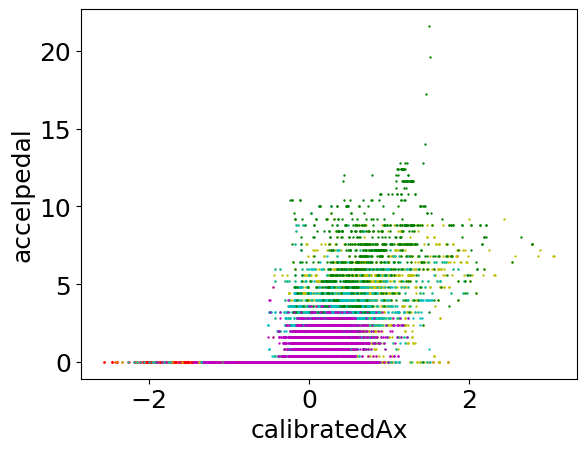

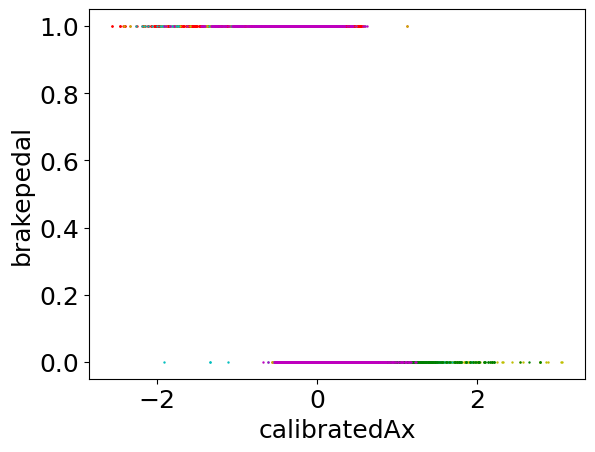

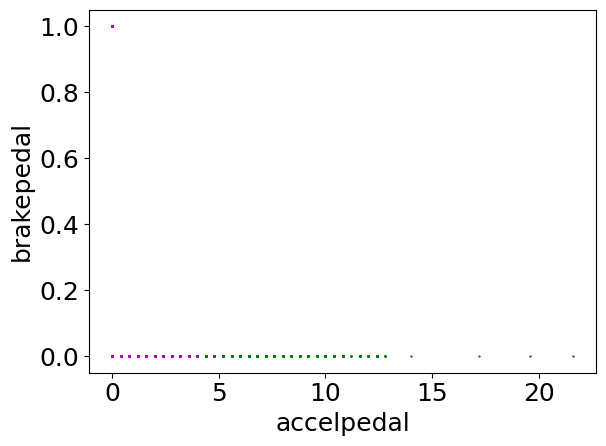

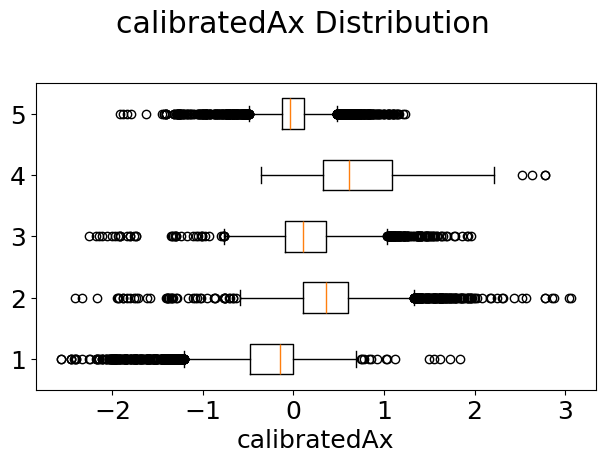

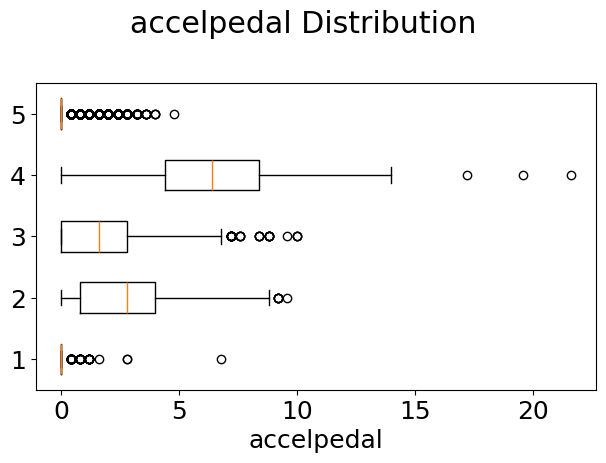

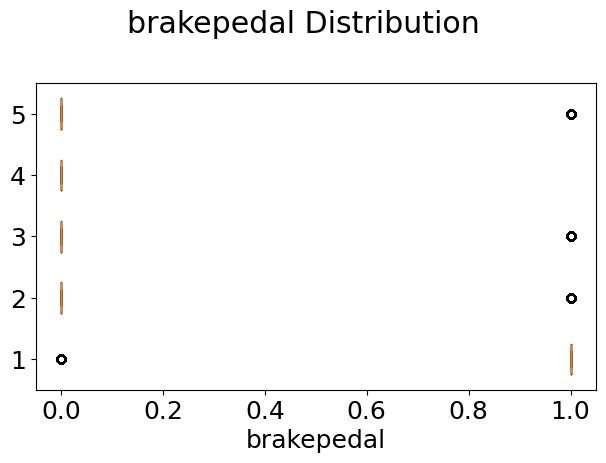

3.0
(1700, 1703.0)
(1709.0, 1712.0)
(1706.0, 1709.0)
(1712.0, 1715.0)
(1703.0, 1706.0)
3.0
(2269.0, 2272.0)
(2266.0, 2269.0)
(2263.0, 2266.0)
(2260, 2263.0)
3.0
(1574.0, 1577.0)
(1580.0, 1583.0)
(1565.0, 1568.0)
(1550, 1553.0)
(1559.0, 1562.0)
(1568.0, 1571.0)
(1562.0, 1565.0)
(1553.0, 1556.0)
(1556.0, 1559.0)
(1571.0, 1574.0)
(1577.0, 1580.0)
3.0
(1625.0, 1628.0)
(1661.0, 1664.0)
(1664.0, 1667.0)
(1667.0, 1670.0)
(1679.0, 1682.0)
(1694.0, 1697.0)
(1697.0, 1700.0)
(1703.0, 1706.0)
(1706.0, 1709.0)
(1622.0, 1625.0)
(1631.0, 1634.0)
(1646.0, 1649.0)
(1652.0, 1655.0)
(1658.0, 1661.0)
(1676.0, 1679.0)
(1691.0, 1694.0)
(1730.0, 1733.0)
(1619.0, 1622.0)
(1628.0, 1631.0)
(1643.0, 1646.0)
(1655.0, 1658.0)
(1673.0, 1676.0)
(1688.0, 1691.0)
(1727.0, 1730.0)
(1610, 1613.0)
(1613.0, 1616.0)
(1616.0, 1619.0)
(1634.0, 1637.0)
(1637.0, 1640.0)
(1640.0, 1643.0)
(1649.0, 1652.0)
(1670.0, 1673.0)
(1682.0, 1685.0)
(1685.0, 1688.0)
(1700.0, 1703.0)
(1709.0, 1712.0)
(1712.0, 1715.0)
(1715.0, 1718.0)
(1718.

In [32]:
# Plot things
# Plot pedal percentage
clusterer.plot_pedal_percentage(clustered_series)
clusterer.plot_time_with_centroid(model, clustered_series, clusterer.data_fields)
clusterer.plot_scatter_pairs(clustered_series, clusterer.data_fields)
clusterer.plot_dist(clustered_series, clusterer.data_fields)
clusterer.plot_regions(model, 5)

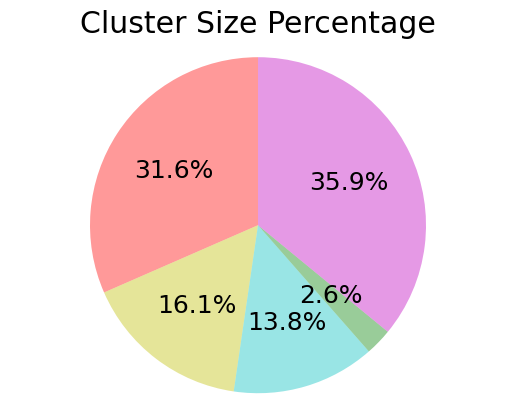

In [29]:
import matplotlib.colors as mcolors

def plot_pie_chart(data):
    """Plot a pie chart using the first n colors from self.cluster_colors."""
    n = len(data)
    colors = [mcolors.to_rgba(clusterer.cluster_colors[i], alpha=0.4) for i in range(n)]

    fig, ax = plt.subplots()
    ax.pie(data, colors=colors[:len(data)], autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title('Cluster Size Percentage')
    # plt.tight_layout()
    plt.show()
    plt.close()

plot_pie_chart([403, 206, 176, 33, 459])